<a href="https://colab.research.google.com/github/Eduardo775/CENIDET/blob/main/Clustering_Iris_M%C3%A9todoCodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El análisis de conglomerados es una técnica estadística multivariada que agrupa las observaciones en función de algunas de sus características o variables que las describen, de modo que:


*   Los ejemplos dentro de un grupo son similares (en este caso, hablamos de alta similitud intraclase).
*   Los ejemplos en diferentes grupos son diferentes (en este caso, hablamos de baja similitud entre clases)

Inercia
El valor Inercia (suma de cuadrados) da una indicación de qué tan coherentes son los diferentes grupos. 

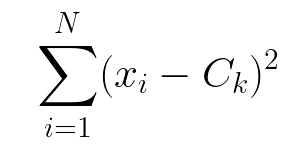

N es el número de muestras dentro del conjunto de datos, C es el centro de un grupo.

Inertia simplemente calcula la distancia al cuadrado de cada muestra en un grupo a su centroide de grupo y los suma.

Este proceso se realiza para cada grupo y todas las muestras dentro de ese conjunto de datos. Cuanto menor sea el valor de Inercia, más coherentes serán los diferentes grupos.

## **Importando las bibliotecas**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans

## **Cargando el conjunto de datos**

In [ ]:
iris = datasets.load_iris()
iris

## **Análisis exploratorio de los datos**

In [5]:
#Creating data frame 
Data = pd.DataFrame(iris.data, columns = iris.feature_names)

#Top values of Dataset
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Bottom Values of Dataset
Data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
# forma del conjunto de datos
Data.shape

(150, 4)

In [ ]:
# información del conjunto de datos
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
# Estadísticos
Data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


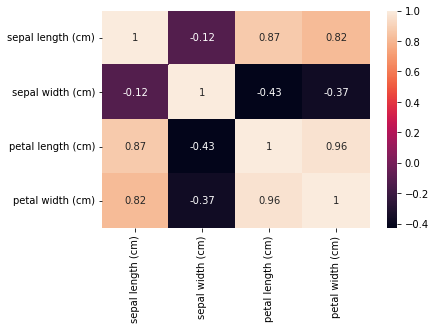

In [6]:
# Matriz de correlación
sns.heatmap(Data.corr(), annot = True, linecolor='black')

## **Búsqueda de números de clusters para Kmeans**
La idea básica de los algoritmos de clustering es la minimización de la varianza intra-cluster y la maximización de la varianza inter-cluster. Es decir, queremos que cada observación se encuentre muy cerca a las de su mismo grupo y los grupos lo más lejos posible entre ellos.

El método del codo utiliza la distancia media de las observaciones a su centroide. Es decir, se fija en las distancias intra-cluster. Cuanto más grande es el número de clusters k, la varianza intra-cluster tiende a disminuir. Cuanto menor es la distancia intra-cluster mejor, ya que significa que los clústers son más compactos. El método del codo busca el valor k que satisfaga que un incremento de k, no mejore sustancialmente la distancia media intra-cluster.

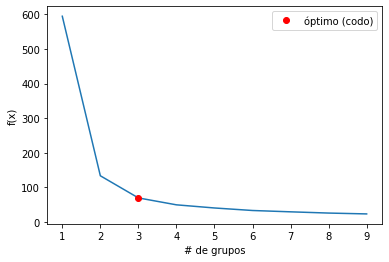

In [23]:
# eliminar la columna de clase para tener sólo las características en df
new_df = Data.iloc[:,0:3].values

# lista vacía para los valores de inercia (función objetivo)
inertia = []

for i in range(1,10):
    # instanciando un modelo kmeans con i clusters
    kmeans = KMeans(n_clusters=i)
    
    # Ajustando en modelo a los datos
    kmeans.fit(new_df)
    
    # añadiendo el valor de la función objetivo del modelo a la lista
    inertia.append(kmeans.inertia_)
    
    # Sabiendo por los datos que tenemos tres distribuciones de muestras
    # guardemos el valor de la función objetivo para el caso k=3
    if i == 3:
        elbow = kmeans.inertia_

# crear una lista con el número de clusters
number_of_clusters = range(1,10)
plt.plot(number_of_clusters, inertia)
plt.plot(3, elbow, 'ro', label='óptimo (codo)')
plt.legend()
plt.xlabel('# de grupos')
plt.ylabel('f(x)')
plt.show()


From one can clearly see that according to the elbow method most accurate value for number of cluseter is 3. 

## **Aplicando KMeans**

In [12]:
#Applying Kmeans 
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(new_df)

In [ ]:
# me da la coordenada de los puntos
kmeans.cluster_centers_

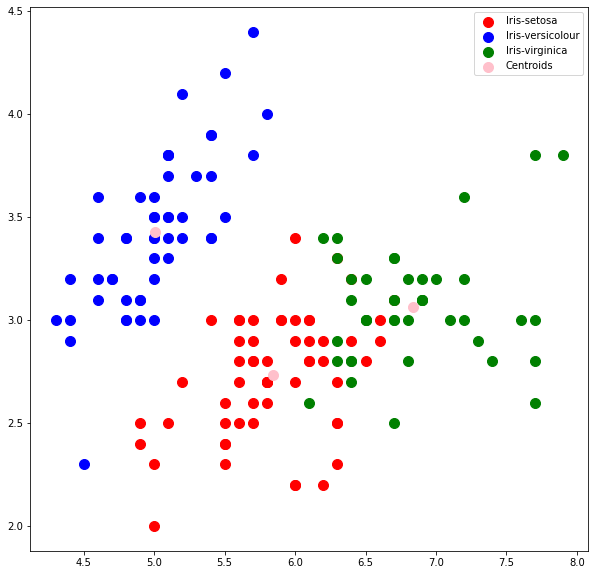

In [20]:
# Visualización de los clusters - En las dos primeras columnas
plt.figure(figsize=(10,10))
plt.scatter(new_df[y_kmeans == 0, 0], new_df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(new_df[y_kmeans == 1, 0], new_df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(new_df[y_kmeans == 2, 0], new_df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Trazar los centroides de los clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'pink', label = 'Centroids')

plt.legend()